In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [6]:
# read the data from the csv file

data = pd.read_csv('train.csv')

In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   battery_power  1892 non-null   float64
 2   blue           1991 non-null   float64
 3   clock_speed    1971 non-null   float64
 4   dual_sim       1967 non-null   float64
 5   fc             1958 non-null   float64
 6   four_g         1973 non-null   float64
 7   int_memory     1951 non-null   float64
 8   m_dep          1956 non-null   float64
 9   mobile_wt      1943 non-null   float64
 10  n_cores        1973 non-null   float64
 11  pc             1967 non-null   float64
 12  px_height      1954 non-null   float64
 13  px_width       1951 non-null   float64
 14  ram            1930 non-null   float64
 15  sc_h           1980 non-null   float64
 16  sc_w           1954 non-null   float64
 17  talk_time      409 non-null    float64
 18  three_g 

In [8]:
# Find duplicate values and remove

def removeDuplicateData(data):
    duplicateDataCount = data.duplicated().sum()
    print("Duplicate data count: ", duplicateDataCount)  
    if duplicateDataCount > 0:
        data.drop_duplicates()
        print('Duplicate values are removed')

In [9]:
removeDuplicateData(data)

Duplicate data count:  0


In [10]:
# Check total null values in the dataset
data.isnull().sum()

id                  0
battery_power     108
blue                9
clock_speed        29
dual_sim           33
fc                 42
four_g             27
int_memory         49
m_dep              44
mobile_wt          57
n_cores            27
pc                 33
px_height          46
px_width           49
ram                70
sc_h               20
sc_w               46
talk_time        1591
three_g             8
touch_screen       17
wifi               35
price_range        61
dtype: int64

In [11]:
# Drop the columns in the dataset
data=data.drop(['id','talk_time'],axis=1)

In [12]:
# Remove any rows with missing values
data=data.dropna()

In [13]:
# Check total null values in the dataset
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

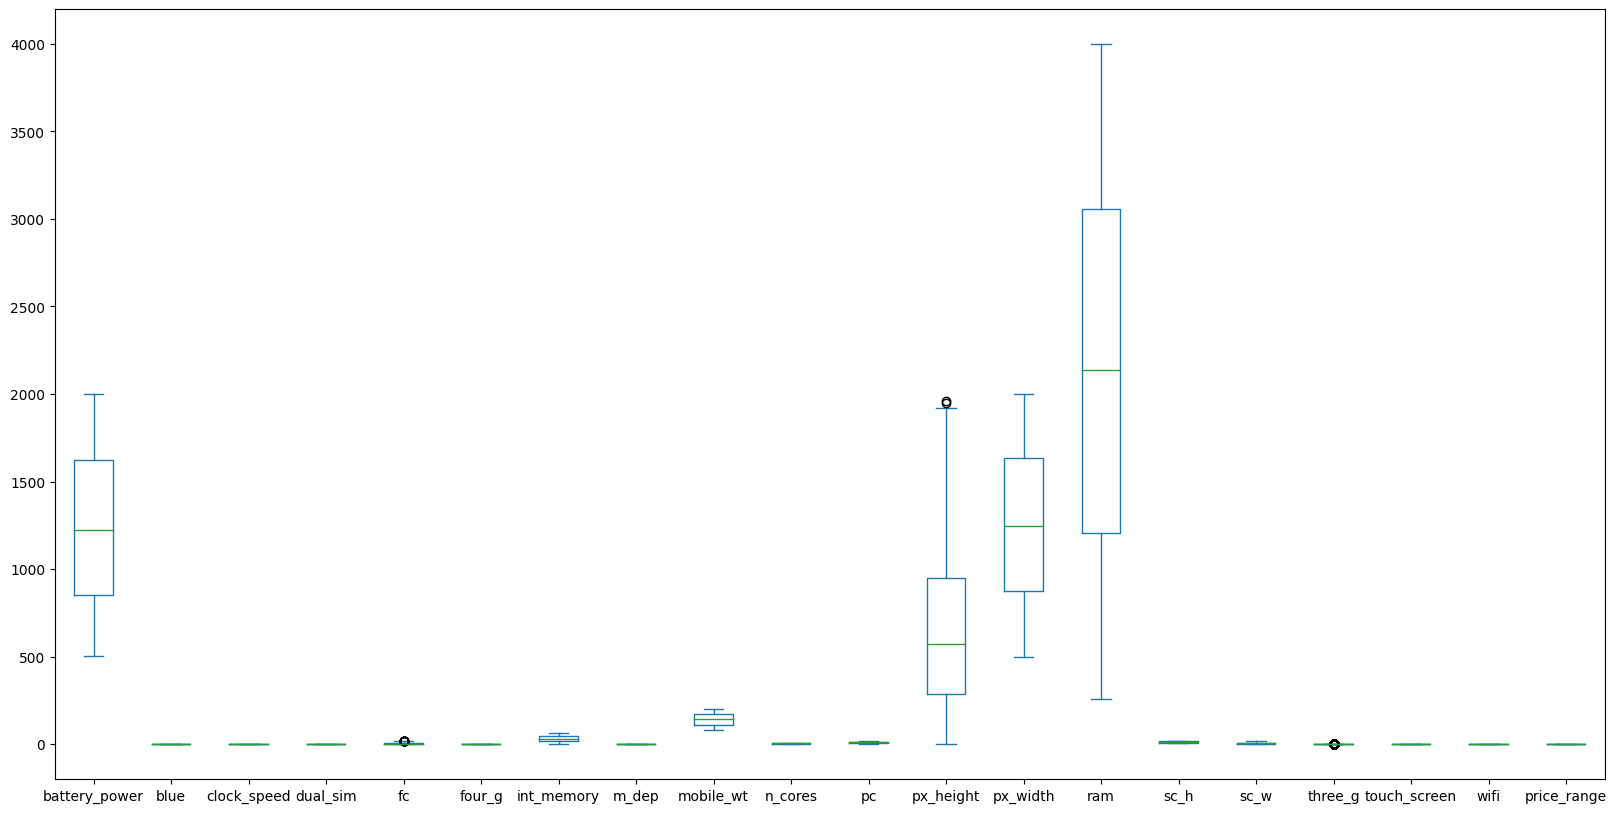

In [14]:
# Plot a box plot to the dataset for check
data.plot(kind='box',figsize=(20,10))
plt.show()

In [15]:
# Drop the price_range column and assign to a variable for training dataset 
X=data.drop('price_range',axis=1)

In [16]:
# Assign the price_range column to a variable for testing dataset
Y=data['price_range']

In [17]:
# Split the dataset 
# X_train: The input training data
# X_test: The input testing data
# Y_train: The target training data
# Y_test: The target testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [18]:
# Normalize the training and testing data using StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Decision Tree Classifier
decisionTree=DecisionTreeClassifier()

In [21]:
# Fit the Decision Tree model on the training data.
decisionTree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
# Predict the target variable values for the testing data.
Y_pred=decisionTree.predict(X_test)
X_test

array([[ 0.59352348, -1.00530508, -0.0197885 , ..., -1.80531297,
         1.00397616,  0.96618002],
       [-1.14915229,  0.99472292,  1.20644978, ...,  0.55392058,
         1.00397616, -1.03500381],
       [-0.4939426 ,  0.99472292, -0.8781553 , ..., -1.80531297,
         1.00397616, -1.03500381],
       ...,
       [-1.24015364,  0.99472292, -0.26503616, ...,  0.55392058,
         1.00397616, -1.03500381],
       [-1.59733392, -1.00530508,  1.08382596, ..., -1.80531297,
         1.00397616, -1.03500381],
       [ 0.89155288,  0.99472292,  1.32907361, ..., -1.80531297,
         1.00397616,  0.96618002]])

In [23]:
# Caluculates the accuracy 
accuracy_percentage = accuracy_score(Y_test,Y_pred)
print("Testing Accuracy: {:.2%}".format(accuracy_percentage))

Testing Accuracy: 85.19%


In [24]:
# export the trained model to a file using pickle
with open('Decision_Tree.pkl', 'wb') as f:
    pickle.dump(decisionTree, f)